### Project Description
Terrorism is a disease which has been stuck with us since forever. Our project aims to analyse terrorist activities which have been carried out throughout the world since 1970 till 2017. We plan to do this by analysing the below mentioned datasets which will give us a deep insight into what, how and where the terrorist activities were carried out through these years.

Hypothesis:

1) We expect to see a decrease in terrorist activities in first world countries(USA, UK, France) as compared to third world countries(Pakistan, Bangladesh, India) due to advancement in technology since 1970s.

2) Attackers who assassinated government officials were holding non-immigrant visas.

3) Unmarried people of ages between 20-35 are more likely to commit terrorist activities as compared to people not categorized in the above criteria.

We can further analyse this dataset further to see what kind of weapons were used to carry out acts of terrorism in different countries and whether the perpetrators were charged or not.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from io import StringIO
from mpl_toolkits.axes_grid1 import Divider, Size
import doctest

warnings.filterwarnings('ignore')

In [2]:
def load_terrorism_file(filename: str) -> pd.DataFrame: #has country,target type
    """
        Load a file efficiently, retaining only the most useful columns & rows.
        Uses Pandas read_csv() with its compression='infer' option.
        
        param filename : terrorism file
        return : dataframe of terrorism file
    """
    
    csv_columns = ['eventid','iyear','imonth','iday','approxdate','extended','resolution','country','country_txt','region','region_txt','provstate','city','latitude','longitude','specificity','vicinity','location','summary','crit1','crit2','crit3','doubtterr','alternative','alternative_txt','multiple','success','suicide','attacktype1','attacktype1_txt','attacktype2','attacktype2_txt','attacktype3','attacktype3_txt','targtype1','targtype1_txt','targsubtype1','targsubtype1_txt','corp1','target1','natlty1','natlty1_txt','targtype2','targtype2_txt','targsubtype2','targsubtype2_txt','corp2','target2','natlty2','natlty2_txt','targtype3','targtype3_txt','targsubtype3','targsubtype3_txt','corp3','target3','natlty3','natlty3_txt','gname','gsubname','gname2','gsubname2','gname3','gsubname3','motive','guncertain1','guncertain2','guncertain3','individual','nperps','nperpcap','claimed','claimmode','claimmode_txt','claim2','claimmode2','claimmode2_txt','claim3','claimmode3','claimmode3_txt','compclaim','weaptype1','weaptype1_txt','weapsubtype1','weapsubtype1_txt','weaptype2','weaptype2_txt','weapsubtype2','weapsubtype2_txt','weaptype3','weaptype3_txt','weapsubtype3','weapsubtype3_txt','weaptype4','weaptype4_txt','weapsubtype4','weapsubtype4_txt','weapdetail','nkill','nkillus','nkillter','nwound','nwoundus','nwoundte','property','propextent','propextent_txt','propvalue','propcomment','ishostkid','nhostkid','nhostkidus','nhours','ndays','divert','kidhijcountry','ransom','ransomamt','ransomamtus','ransompaid','ransompaidus','ransomnote','hostkidoutcome','hostkidoutcome_txt','nreleased','addnotes','scite1','scite2','scite3','dbsource','INT_LOG','INT_IDEO','INT_MISC','INT_ANY','related']
    
    columns_wanted = ['iyear','country_txt','attacktype1_txt','targtype1_txt']
    
    df = pd.read_csv('terrorism.csv',
                    compression='infer',
                    names=csv_columns,
                    usecols=columns_wanted,
                    )
    
    df['iyear'] = pd.to_numeric(df['iyear'], errors='coerce')
    
    return df

In [53]:
terrorism_data

,iyear,country_txt,attacktype1_txt,targtype1_txt
0,NaN,country_txt,attacktype1_txt,targtype1_txt
1,1970.0,Dominican Republic,Assassination,Private Citizens & Property
2,1970.0,Mexico,Hostage Taking (Kidnapping),Government (Diplomatic)
3,1970.0,Philippines,Assassination,Journalists & Media
4,1970.0,Greece,Bombing/Explosion,Government (Diplomatic)
...,...,...,...,...
181687,2017.0,Somalia,Armed Assault,Military
181688,2017.0,Syria,Bombing/Explosion,Military
181689,2017.0,Philippines,Facility/Infrastructure Attack,Private Citizens & Property
181690,2017.0,India,Bombing/Explosion,Government (General)


In [39]:
def load_perp_file(filename: str) -> pd.DataFrame: 
    """
        Load a file efficiently, retaining only the most useful columns & rows.
        Uses Pandas read_csv() with its compression='infer' option.
        
        param filename : perps.csv
        return : dataframe of perps file
    """

    csv_columns = ['person_id','first_name','last_name','full_name','headshot','headshot_credit','gender','age','inv_informant','inv_public_tip','inv_community_or_family_tip','marital_status','terror_plot','terror_plot_2','plot_id','citizenship_status','charged_or_deceased','year_charged_or_deceased','date_charged','state_charged','state_charged_2','last_residency_state','last_residency_country','char_awlaki','char_contact_with_foreign_militant','char_overseas_military_training','char_us_military_experience','char_online_radicalization','targeted_jews_israel','targeted_military_installation']
    
    columns_wanted = ['first_name','last_name','full_name','age','citizenship_status','marital_status']
    
    df = pd.read_csv('perps.csv',
                    compression='infer',
                    names=csv_columns,
                    usecols=columns_wanted,
                    )   
    
    df['age'] = pd.to_numeric(df['age'],errors='coerce')

    return df

In [54]:
perpetrators_data

,first_name,last_name,full_name,age,marital_status,citizenship_status
0,first_name,last_name,full_name,NaN,marital_status,citizenship_status
1,Zacharias,Moussaui,Zacharias Moussaui,33.0,Unmarried,Nonimmigrant Visa
2,Richard,Reid,Richard Reid,28.0,Unmarried,Unknown
3,John Walker,Lindh,John Walker Lindh,20.0,Unmarried,U.S. Born Citizen
4,Ali,al-Marri,Ali al-Marri,36.0,Married,Nonimmigrant Visa
...,...,...,...,...,...,...
393,Balwinder,Singh,Balwinder Singh,39.0,Unknown,Permanent Resident
394,Samy Mohammed,el-Goarany,Samy Mohammed El-Goarany,24.0,Married,U.S. Born Citizen
395,Saynab Abdirashid,Hussein,Saynab Abdirashid Hussein,24.0,Unmarried,Permanent Resident
396,Lionel Nelson,Williams,Lionel Nelson Williams,26.0,Unmarried,U.S. Born Citizen


In [41]:
def load_income_file(filename: str) -> pd.DataFrame:
    """
        Cleaning and loading income file to get country, region and income
        
        param filename : CLASS.xls
        return : dataframe of income file    
    """
    
    xls = pd.ExcelFile(r"CLASS.xls")
    sheetX = xls.parse(0, skiprows=5)
    sheetX = sheetX.rename(columns = {'x.2' : 'country_txt','x.5':'Region','x.6':'Income'})
    sheetX = sheetX[['country_txt','Region','Income']].head(218)
    
    return sheetX

In [55]:
income_data

,country_txt,Region,Income
0,Afghanistan,South Asia,Low income
1,Albania,Europe & Central Asia,Upper middle income
2,Algeria,Middle East & North Africa,Lower middle income
3,American Samoa,East Asia & Pacific,Upper middle income
4,Andorra,Europe & Central Asia,High income
...,...,...,...
213,Virgin Islands (U.S.),Latin America & Caribbean,High income
214,West Bank and Gaza,Middle East & North Africa,Lower middle income
215,"Yemen, Rep.",Middle East & North Africa,Low income
216,Zambia,Sub-Saharan Africa,Lower middle income


In [43]:
def load_population_data(filename: str) -> pd.DataFrame:
    """
        Loading population data as per required column names for merging the files
        
        param filename : country_population.csv
        return : dataframe of country_population file
    """
    
    population_data = pd.read_csv('country_population.csv',names=['country_txt', 'Country Code', 'Indicator Name', 'Indicator Code',
   '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
   '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
   '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
   '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
   '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
   '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
   '2014', '2015', '2016'])  
    
    return population_data


In [56]:
population_data

,country_txt,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Country Name,Country Code,Indicator Name,Indicator Code,1960.0,1961.0,1962.0,1963.0,1964.0,1965.0,...,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0
1,Aruba,ABW,"Population, total",SP.POP.TOTL,54211.0,55438.0,56225.0,56695.0,57032.0,57360.0,...,101220.0,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996351.0,9166764.0,9345868.0,9533954.0,9731361.0,9938414.0,...,26616792.0,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0
3,Angola,AGO,"Population, total",SP.POP.TOTL,5643182.0,5753024.0,5866061.0,5980417.0,6093321.0,6203299.0,...,20997687.0,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0
4,Albania,ALB,"Population, total",SP.POP.TOTL,1608800.0,1659800.0,1711319.0,1762621.0,1814135.0,1864791.0,...,2970017.0,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,Kosovo,XKX,"Population, total",SP.POP.TOTL,947000.0,966000.0,994000.0,1022000.0,1050000.0,1078000.0,...,1733404.0,1747383.0,1761474.0,1775680.0,1791000.0,1805200.0,1824100.0,1821800.0,1801800.0,1816200.0
261,"Yemen, Rep.",YEM,"Population, total",SP.POP.TOTL,5172135.0,5260501.0,5351799.0,5446063.0,5543339.0,5643643.0,...,21751605.0,22356391.0,22974929.0,23606779.0,24252206.0,24909969.0,25576322.0,26246327.0,26916207.0,27584213.0
262,South Africa,ZAF,"Population, total",SP.POP.TOTL,17456855.0,17920673.0,18401608.0,18899275.0,19412975.0,19942303.0,...,49887181.0,50412129.0,50970818.0,51584663.0,52263516.0,52998213.0,53767396.0,54539571.0,55291225.0,56015473.0
263,Zambia,ZMB,"Population, total",SP.POP.TOTL,3044846.0,3140264.0,3240587.0,3345145.0,3452942.0,3563407.0,...,12725974.0,13082517.0,13456417.0,13850033.0,14264756.0,14699937.0,15153210.0,15620974.0,16100587.0,16591390.0


### Hypothesis 1

In [45]:
def mergeCountryIncome(terrorism_data,income_data):
    """
        This function is used to merge terrorism_data with income_data to include the income column for testing our first hypothesis.
        param terrorism_data : dataframe of terrorism_data
        
        param income_data : dataframe of income_data
        return: dataFrame with country_txt and income columns from specified dataFrames in the function
    """
    
    terrorism_data = terrorism_data.iloc[1:]      # Done for removing the first row causig NaNs in the data.

    result = terrorism_data.merge(income_data, on='country_txt', how='left')
    
    return result


In [57]:
countryIncome

,iyear,country_txt,attacktype1_txt,targtype1_txt,Region,Income
0,1970.0,Dominican Republic,Assassination,Private Citizens & Property,Latin America & Caribbean,Upper middle income
1,1970.0,Mexico,Hostage Taking (Kidnapping),Government (Diplomatic),Latin America & Caribbean,Upper middle income
2,1970.0,Philippines,Assassination,Journalists & Media,East Asia & Pacific,Lower middle income
3,1970.0,Greece,Bombing/Explosion,Government (Diplomatic),Europe & Central Asia,High income
4,1970.0,Japan,Facility/Infrastructure Attack,Government (Diplomatic),East Asia & Pacific,High income
...,...,...,...,...,...,...
181686,2017.0,Somalia,Armed Assault,Military,Sub-Saharan Africa,Low income
181687,2017.0,Syria,Bombing/Explosion,Military,NaN,NaN
181688,2017.0,Philippines,Facility/Infrastructure Attack,Private Citizens & Property,East Asia & Pacific,Lower middle income
181689,2017.0,India,Bombing/Explosion,Government (General),South Asia,Lower middle income


In [6]:
def thirdWorldCountry(countryIncome):
    """
        This function takes the country names and returns two dataframes based on income groups

        param countryIncome: DataFrame of countries with their income groups
        return lowIncome: contains country names, regions and incomes of low income countries
        return lowIncomeCountries: contains year and count of low income countries
    """

    options=['Lower middle income','Low income']

    lowIncome = countryIncome[countryIncome['Income'].isin(options)]

    lowIncomeCountries=lowIncome.groupby(['iyear']).agg(country_countL = ('country_txt','count'))
    
    return lowIncome,lowIncomeCountries


In [58]:
thirdWorldIncome

,iyear,country_txt,attacktype1_txt,targtype1_txt,Region,Income
2,1970.0,Philippines,Assassination,Journalists & Media,East Asia & Pacific,Lower middle income
16,1970.0,Ethiopia,Unknown,Military,Sub-Saharan Africa,Low income
26,1970.0,Philippines,Bombing/Explosion,Government (Diplomatic),East Asia & Pacific,Lower middle income
39,1970.0,Philippines,Unknown,Military,East Asia & Pacific,Lower middle income
96,1970.0,Philippines,Bombing/Explosion,Government (Diplomatic),East Asia & Pacific,Lower middle income
...,...,...,...,...,...,...
181685,2017.0,Afghanistan,Bombing/Explosion,Business,South Asia,Low income
181686,2017.0,Somalia,Armed Assault,Military,Sub-Saharan Africa,Low income
181688,2017.0,Philippines,Facility/Infrastructure Attack,Private Citizens & Property,East Asia & Pacific,Lower middle income
181689,2017.0,India,Bombing/Explosion,Government (General),South Asia,Lower middle income


In [59]:
thirdWorldCountries

,country_countL
iyear,
1970.0,16
1971.0,10
1972.0,13
1973.0,10
1974.0,15
1975.0,23
1976.0,40
1977.0,27
1978.0,221


In [9]:
def firstWorldCountry(countryIncome):
    """
        This function takes the country names and returns two dataframes based on income groups

        param countryIncome: DataFrame of countries with their income groups
        return highIncome: contains country names, regions and incomes of high income countries
        return highIncomeCountries: contains year and count of high income countries
    """
    
    options=['High income','Upper middle income']

    highIncome = countryIncome[countryIncome['Income'].isin(options)]

    highIncomeCountries=highIncome.groupby(['iyear']).agg(country_countH = ('country_txt','count'))
    
    highIncomeCountries = highIncomeCountries.iloc[1:]

    
    return highIncome,highIncomeCountries


In [60]:
firstWorldIncome

,iyear,country_txt,attacktype1_txt,targtype1_txt,Region,Income
0,1970.0,Dominican Republic,Assassination,Private Citizens & Property,Latin America & Caribbean,Upper middle income
1,1970.0,Mexico,Hostage Taking (Kidnapping),Government (Diplomatic),Latin America & Caribbean,Upper middle income
3,1970.0,Greece,Bombing/Explosion,Government (Diplomatic),Europe & Central Asia,High income
4,1970.0,Japan,Facility/Infrastructure Attack,Government (Diplomatic),East Asia & Pacific,High income
5,1970.0,United States,Armed Assault,Police,North America,High income
...,...,...,...,...,...,...
181670,2017.0,Iraq,Unknown,Police,Middle East & North Africa,Upper middle income
181671,2017.0,Iraq,Bombing/Explosion,Private Citizens & Property,Middle East & North Africa,Upper middle income
181674,2017.0,Iraq,Unknown,Military,Middle East & North Africa,Upper middle income
181679,2017.0,Iraq,Armed Assault,Military,Middle East & North Africa,Upper middle income


In [61]:
firstWorldCountries

,country_countH
iyear,
1971.0,426
1972.0,502
1973.0,426
1974.0,516
1975.0,662
1976.0,820
1977.0,1234
1978.0,1221
1979.0,1773


In [12]:
def lowIncomePopulation(thirdWorldCountries,population_data):
    
    """
        This function calculates population of low income countries year wise
        
        param thirdWorldCountries: contains country names, regions and incomes of third world income countries
        param population_data: dataframe of country_population file
        return h_stack: dataframe of population of required countries by each year
    """
    
    lowIncomePop = thirdWorldCountries.merge(population_data, on='country_txt', how='left')
    
    lowIncomePopln = lowIncomePop.drop_duplicates('country_txt')
    
    reqCol = lowIncomePopln[['country_txt','1970','1971','1972','1973','1974','1975','1976','1977','1978','1979','1980','1981','1982','1983','1984','1985','1986','1987','1988','1989','1990','1991','1992','1993','1994','1995','1996','1997','1998','1999','2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016']]
    
    reqCol.T
    
    c=[]
    d=[]
    for (columnName, columnData) in reqCol.iteritems():
        c.append(columnName)
        d.append(columnData.values.sum())

    dfreq = pd.DataFrame(c,columns = ['iyear'])
    dfreq1 = pd.DataFrame(d,columns = ['Population_low'])
    
    horizontal_stack = pd.concat([dfreq, dfreq1], axis=1)
    horizontal_stack = horizontal_stack.iloc[1:]  
    
    h_stack = horizontal_stack.dropna()
    
    return h_stack

In [62]:
twcountriesPercentPop

,iyear,Population_low
1,1970,1.18591e+09
2,1971,1.21372e+09
3,1972,1.24222e+09
4,1973,1.27148e+09
5,1974,1.30157e+09
6,1975,1.33255e+09
7,1976,1.36443e+09
8,1977,1.39721e+09
9,1978,1.43094e+09
10,1979,1.46569e+09


In [14]:
def highIncomePopulation(firstWorldCountries,population_data):
    
    """
        This function calculates population of high income countries year wise
        
        param firstWorldCountries: contains country names, regions and incomes of first world income countries
        param population_data: dataframe of country_population file
        return h_stack: dataframe of population of required countries by each year
    """
    
    highIncomePop = firstWorldCountries.merge(population_data, on='country_txt', how='left')

    highIncomePopln = highIncomePop.drop_duplicates('country_txt')
    
    
    reqCol = highIncomePopln[['country_txt','1970','1971','1972','1973','1974','1975','1976','1977','1978','1979','1980','1981','1982','1983','1984','1985','1986','1987','1988','1989','1990','1991','1992','1993','1994','1995','1996','1997','1998','1999','2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016']]
    
    reqCol.T
    
    a=[]
    b=[]
    for (columnName, columnData) in reqCol.iteritems():
        a.append(columnName)
        b.append(columnData.values.sum())

    dfreqL = pd.DataFrame(a,columns = ['iyear'])
    dfreqL1 = pd.DataFrame(b,columns = ['Population_high'])
    
    horizontal_stack = pd.concat([dfreqL, dfreqL1], axis=1)
    horizontal_stack = horizontal_stack.iloc[1:] 
    

    h_stack = horizontal_stack.dropna()
    return h_stack

In [63]:
fwcountriesPercentPop

,iyear,Population_high
21,1990,2.90874e+09
22,1991,2.9455e+09
26,1995,3.08156e+09
27,1996,3.11352e+09
28,1997,3.14546e+09
29,1998,3.17619e+09
30,1999,3.20592e+09
31,2000,3.23454e+09
32,2001,3.26263e+09
33,2002,3.29002e+09


In [16]:
def percentFirstWorldCountries(sumPopulationBYearHigh,firstWorldCountries):
    
    """
        This function calculates the division of terrorist activites and total population of countries according to years
        
        param sumPopulationBYearHigh: dataframe of population of required first world countries by each year
        param firstWorldCountries: dataframe of first world country_population file
        return percentfwc: dataframe containing division of terrorist activities by population by year
    """

    sumPopulationBYearHigh['iyear'] = pd.to_numeric(sumPopulationBYearHigh['iyear'], errors='coerce')

    percentfwc = pd.merge(firstWorldCountries,sumPopulationBYearHigh, on='iyear')

    percentfwc['division_high'] = (percentfwc['country_countH']/percentfwc['Population_high'])*100
        
    return percentfwc

In [64]:
percentFWCountries

,iyear,country_countH,Population_high,division_high
0,1990.0,2243,2.90874e+09,7.71125e-05
1,1991.0,2809,2.9455e+09,9.53658e-05
2,1995.0,1130,3.08156e+09,3.66697e-05
3,1996.0,1544,3.11352e+09,4.95901e-05
4,1997.0,1609,3.14546e+09,5.11531e-05
5,1998.0,408,3.17619e+09,1.28456e-05
6,1999.0,741,3.20592e+09,2.31135e-05
7,2000.0,782,3.23454e+09,2.41765e-05
8,2001.0,807,3.26263e+09,2.47347e-05
9,2002.0,486,3.29002e+09,1.4772e-05


In [18]:
def percentThirdWorldCountries(sumPopulationBYearlow,thirdWorldCountries):
    
    """
        This function calculates the division of terrorist activites and total population of countries according to years
        
        param sumPopulationBYearlow: dataframe of population of required third world countries by each year
        param thirdWorldCountries: dataframe of third world country_population file
        return percenttwc: dataframe containing division of terrorist activities by population by year
    """

    sumPopulationBYearlow['iyear'] = pd.to_numeric(sumPopulationBYearlow['iyear'], errors='coerce')
    
    percenttwc = pd.merge(thirdWorldCountries,sumPopulationBYearlow,  on='iyear')
    
    percenttwc['division_low'] = (percenttwc['country_countL']/percenttwc['Population_low'])*100
        
    return percenttwc

In [65]:
percentTWCountries

,iyear,country_countL,Population_low,division_low
0,1970.0,16,1.18591e+09,1.34918e-06
1,1971.0,10,1.21372e+09,8.23916e-07
2,1972.0,13,1.24222e+09,1.04651e-06
3,1973.0,10,1.27148e+09,7.86485e-07
4,1974.0,15,1.30157e+09,1.15245e-06
5,1975.0,23,1.33255e+09,1.72601e-06
6,1976.0,40,1.36443e+09,2.93162e-06
7,1977.0,27,1.39721e+09,1.93242e-06
8,1978.0,221,1.43094e+09,1.54444e-05
9,1979.0,684,1.46569e+09,4.66674e-05


In [20]:
def chartPrepData(percentFWCountries,percentTWCountries):
    """
        Merging files based on year to plot chart
        
        param percentFWCountries: dataframe containing division of terrorist activities by population by year for first world countries
        param percentTWCountries: dataframe containing division of terrorist activities by population by year for third world countries
        return result: Dataframe year wise with division of terrorist activities and population
    """
    
    result = percentFWCountries.merge(percentTWCountries, on='iyear', how='inner')
    
    return result
    

In [66]:
percentBothType

,iyear,country_countH,Population_high,division_high,country_countL,Population_low,division_low
0,1990.0,2243,2.90874e+09,7.71125e-05,1470,1.90446e+09,7.71872e-05
1,1991.0,2809,2.9455e+09,9.53658e-05,1686,1.94754e+09,8.65709e-05
2,1995.0,1130,3.08156e+09,3.66697e-05,1683,2.12229e+09,7.9301e-05
3,1996.0,1544,3.11352e+09,4.95901e-05,1250,2.16645e+09,5.76982e-05
4,1997.0,1609,3.14546e+09,5.11531e-05,1293,2.21088e+09,5.84834e-05
5,1998.0,408,3.17619e+09,1.28456e-05,400,2.2556e+09,1.77336e-05
6,1999.0,741,3.20592e+09,2.31135e-05,517,2.3005e+09,2.24733e-05
7,2000.0,782,3.23454e+09,2.41765e-05,794,2.3458e+09,3.38477e-05
8,2001.0,807,3.26263e+09,2.47347e-05,723,2.39145e+09,3.02327e-05
9,2002.0,486,3.29002e+09,1.4772e-05,632,2.43746e+09,2.59286e-05


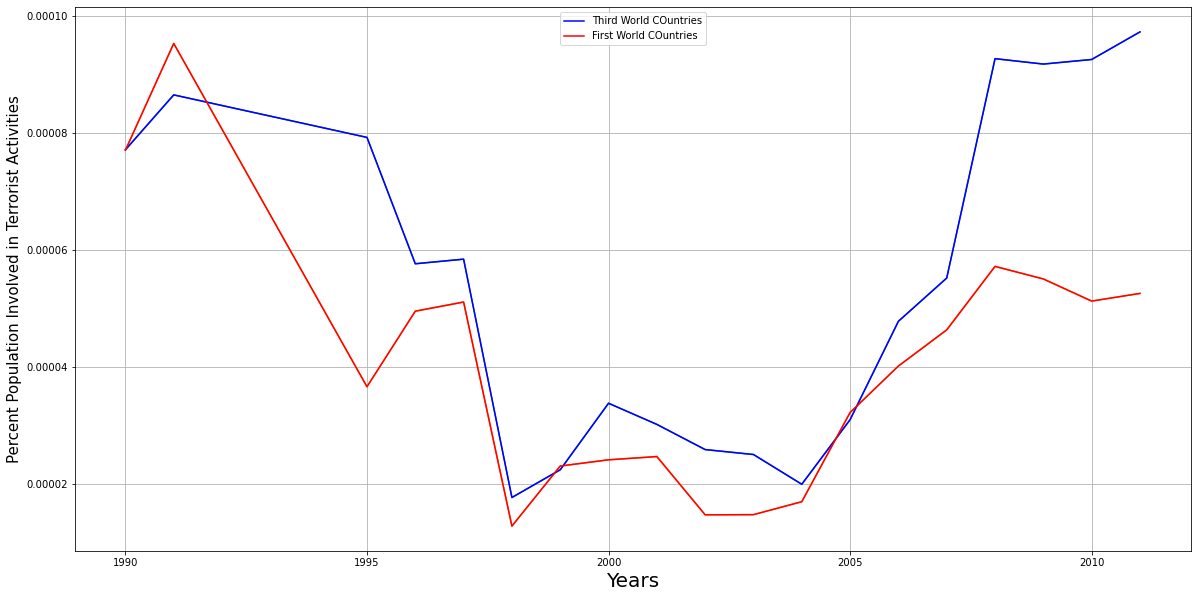

In [67]:
#plots the terrorism count of first and third world countries  

x = percentBothType['iyear']
y = percentBothType['division_low']
z = percentBothType['division_high']
plt.figure(figsize=(20, 10))
plt.plot(x, y)
plt.plot(x, z)
plt.xlabel("Years",fontsize=20)
plt.ylabel("Percent Population Involved in Terrorist Activities",fontsize=15)
plt.plot(x, y, "-b", label="Third World COuntries")
plt.plot(x, z, "-r", label="First World COuntries")
plt.legend(loc="upper center")

plt.grid()
plt.show()

### Hypothesis 2

In [23]:
def citizenship(terrorism_data,terrorists_data):
    """
    This function is used to merge terrorism_data with terrorists_data to include the citizenship_status column for testing our second hypothesis.

    param terrorism_data:dataframe of terrorism file
    param terrorists_data: dataframe of terrorists file
    return: dataFrame with citizenship_status and targtype1_txt columns from specified dataFrames in the function.
        
    >>> data = {'iyear':['1970.0', '1980.0'],'country_txt':['Dominican Republic', 'test'],'attacktype1_txt':['Assassination','Assassination2'],'targtype1_txt':['Government (Diplomatic)','Government (Diplomatic)2']}

    >>> data2 = {'column_a':['167', '168'],'citizenship_status':['abc', 'pqr'],'full_name':['pqr','asd'],'country_txt':['Dominican Republic', 'test']}
    >>> df_test = pd.DataFrame(data)
    >>> df_test2 = pd.DataFrame(data2)
    >>> citizenship(df_test,df_test2).head(1)[['iyear','country_txt','citizenship_status']]
        iyear         country_txt citizenship_status
    0  1970.0  Dominican Republic                abc
   """

    citizenshipStatus = pd.merge(terrorism_data,terrorists_data,how='inner', on='country_txt')
    
    return citizenshipStatus

doctest.testmod()

TestResults(failed=0, attempted=5)

In [68]:
citizenshipStatus

,iyear,country_txt,attacktype1_txt,targtype1_txt,column_a,citizenship_status,full_name
0,1970.0,Dominican Republic,Assassination,Private Citizens & Property,167,Naturalized Citizen,Carlos Almonte
1,1970.0,Dominican Republic,Assassination,Private Citizens & Property,208,Naturalized Citizen,Jose Pimentel
2,1970.0,Dominican Republic,Hostage Taking (Kidnapping),Military,167,Naturalized Citizen,Carlos Almonte
3,1970.0,Dominican Republic,Hostage Taking (Kidnapping),Military,208,Naturalized Citizen,Jose Pimentel
4,1971.0,Dominican Republic,Armed Assault,Educational Institution,167,Naturalized Citizen,Carlos Almonte
...,...,...,...,...,...,...,...
1341646,2017.0,Kosovo,Unarmed Assault,Private Citizens & Property,90,Permanent Resident,Agron Abdullahu
1341647,2017.0,Kosovo,Facility/Infrastructure Attack,Private Citizens & Property,90,Permanent Resident,Agron Abdullahu
1341648,2017.0,Kosovo,Unarmed Assault,Journalists & Media,90,Permanent Resident,Agron Abdullahu
1341649,2017.0,Kosovo,Bombing/Explosion,Military,90,Permanent Resident,Agron Abdullahu


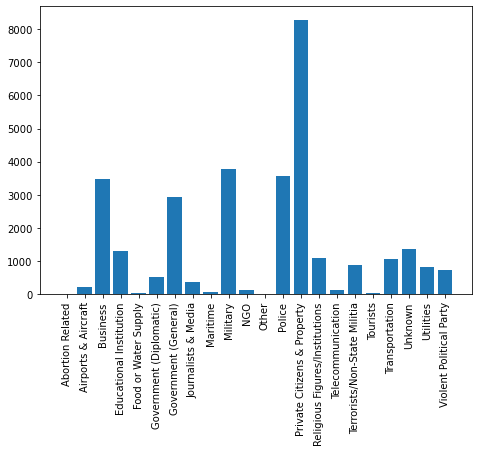

In [70]:
### To check who Nonimmigrant visa holders targeted the most.

options=['Nonimmigrant Visa']

res_4 = citizenshipStatus[citizenshipStatus['citizenship_status'].isin(options)]

target_type=res_4.groupby(['targtype1_txt']).agg(cit_count = ('citizenship_status','count'))


x = target_type.index.tolist()
y = target_type['cit_count']

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(x,y)
plt.xticks(rotation=90)
plt.show()


In [28]:
def displayPlots(citizeshipStatus):
    countries=['United Kingdom','France','Pakistan','Bangladesh','Qatar']

    for i in countries:


        options1=[i]
        options=['Nonimmigrant Visa']

        citizenstatus=citizenshipStatus[citizenshipStatus['country_txt'].isin(options1)]

        res_4 = citizenstatus[citizenstatus['citizenship_status'].isin(options)]

        target_type=res_4.groupby(['targtype1_txt']).agg(cit_count = ('citizenship_status','count'))


        x = target_type.index.tolist()
        y = target_type['cit_count']

        fig = plt.figure()
        ax = fig.add_axes([0,0,1,1])
        ax.bar(x,y)
        plt.xticks(rotation=90)
        ax.set_title(i)
        plt.show()


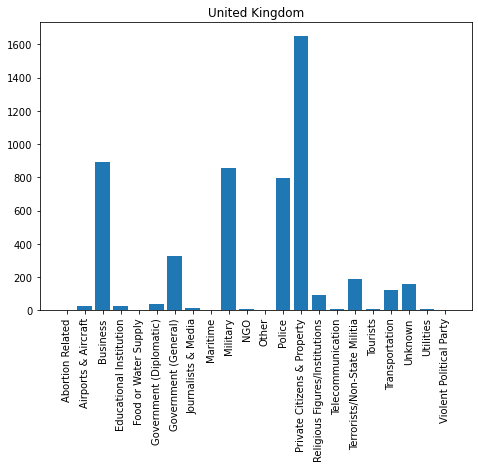

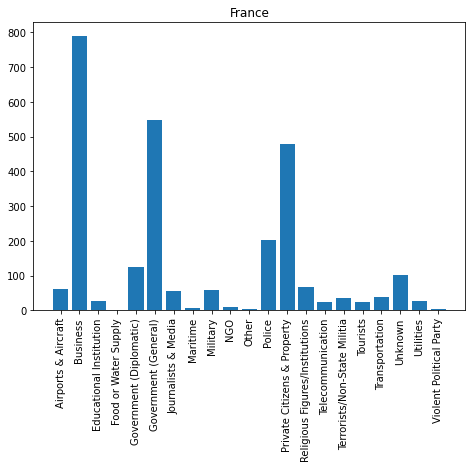

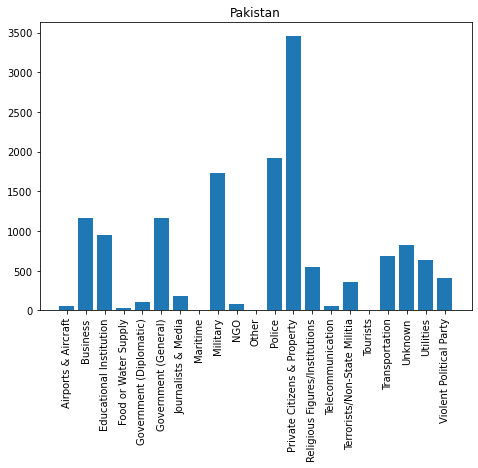

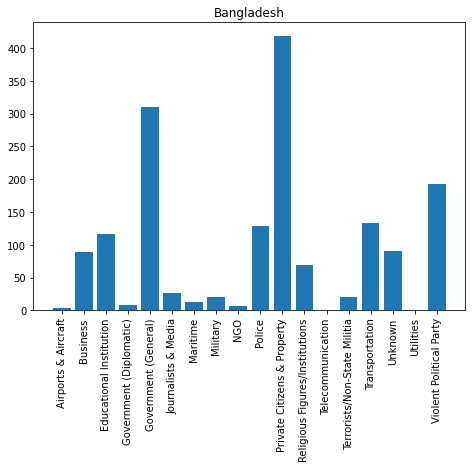

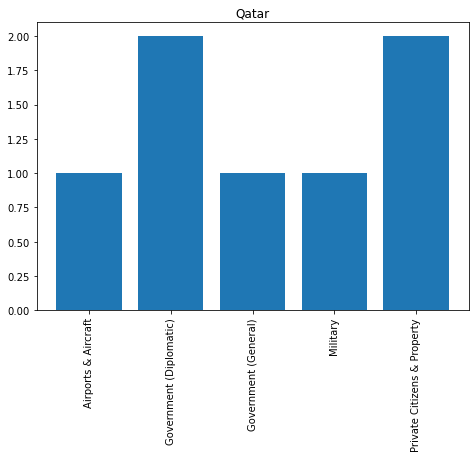

In [71]:
displayPlots(citizenshipStatus)

### Hypothesis 3

In [30]:
def age(citizenshipStatus,perpetrators_data):
    
    """
        This function is used to merge citizenshipStatus with perpetrators_data to include the age column for testing our third hypothesis.
        
        param citizenshipStatus: dataframe of terrorists file
        param perpetrators_data: dataframe of perps file
        return age_df: dataFrame with age and marital_status columns from specified dataFrames in the function
    """
    age_df = pd.merge(citizenshipStatus, perpetrators_data, how='inner', on='citizenship_status')
    
    return age_df

In [72]:
ageBins

,iyear,country_txt,attacktype1_txt,targtype1_txt,column_a,citizenship_status,full_name_x,first_name,last_name,full_name_y,age,marital_status
0,1970.0,Dominican Republic,Assassination,Private Citizens & Property,167,Naturalized Citizen,Carlos Almonte,Shueyb Mossa,Jokhan,Shueyb Mossa Jokhan,24.0,Unmarried
1,1970.0,Dominican Republic,Assassination,Private Citizens & Property,167,Naturalized Citizen,Carlos Almonte,Jaber A.,Elbaneh,Jaber A. Elbaneh,36.0,Married
2,1970.0,Dominican Republic,Assassination,Private Citizens & Property,167,Naturalized Citizen,Carlos Almonte,Mukhtar,al-Bakri,Mukhtar al-Bakri,23.0,Married
3,1970.0,Dominican Republic,Assassination,Private Citizens & Property,167,Naturalized Citizen,Carlos Almonte,Maher Mofeid,Hawash,Maher Mofeid Hawash,38.0,Married
4,1970.0,Dominican Republic,Assassination,Private Citizens & Property,167,Naturalized Citizen,Carlos Almonte,Iyman,Faris,Iyman Faris,34.0,Divorced
...,...,...,...,...,...,...,...,...,...,...,...,...
137800809,2015.0,Qatar,Unknown,Government (Diplomatic),326,Citizen of Unknown Status,Ali Saleh,Abdirazak,Warsame,Abdirazak Warsame,20.0,Unmarried
137800810,2015.0,Qatar,Unknown,Government (Diplomatic),326,Citizen of Unknown Status,Ali Saleh,Mohammed,ElShinawy,Mohamed ElShinaway,30.0,Unknown
137800811,2015.0,Qatar,Unknown,Government (Diplomatic),326,Citizen of Unknown Status,Ali Saleh,Jalil Ibn,Aziz,Jalil Ibn Ameer Aziz,19.0,Unmarried
137800812,2015.0,Qatar,Unknown,Government (Diplomatic),326,Citizen of Unknown Status,Ali Saleh,Shazad,Rouaf,Shazad Rouaf,24.0,Unknown


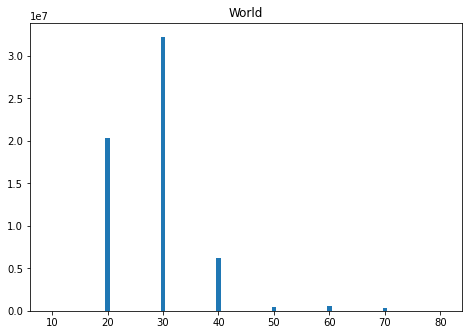

In [73]:
        
ageBins['bin'] = pd.cut(ageBins['age'], bins = [0,10,20,30,40,50,60,70,80],labels = [10,20,30,40,50,60,70,80])

ageBins.head()

options=['Unmarried']

res_1 = ageBins[ageBins['marital_status'].isin(options)]

res_2 = res_1.groupby(['bin']).agg(count = ('marital_status','count'))

x = res_2.index.tolist()
y = res_2['count']

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(x,y)
ax.set_title('World')
plt.show()


In [33]:
def displayAgePlots(ageBinsFilter):
    """
        This function is used to return a pandas series that denotes the age bins of terrorists.
        Age data retrieved from: 
        Age Groups and their respective count:
            
        bin:count
        0-9:0
        10-19:7799
        20-29:19415
        30-39:3263
        40-49:0
        50-59:392
        60-69:572
        70-80:0
        
        :param ageBins:Filters the dataframe based on countries mentioned.
        :param res_1:Filters the dataframe based on marital status (unmarried) as mentioned. 
        :param res_2:Counts the number of unmarried terrorists by age-group. 
        :param row: Denotes that the operation has to be performed across rows
        
        

        """
    
    countries=['United Kingdom','France','Pakistan','Bangladesh','Qatar']
    for i in countries:
        
        options=[i]

        ageBins = ageBinsFilter[ageBinsFilter['country_txt'].isin(options)]
        
        ageBins['bin'] = pd.cut(ageBins['age'], bins = [0,10,20,30,40,50,60,70,80],labels = [10,20,30,40,50,60,70,80])

        ageBins.head()

        options=['Unmarried']

        res_1 = ageBins[ageBins['marital_status'].isin(options)]

        res_2 = res_1.groupby(['bin']).agg(count = ('marital_status','count'))

        x = res_2.index.tolist()
        y = res_2['count']
        
        fig = plt.figure()
        ax = fig.add_axes([0,0,1,1])
        ax.bar(x,y)
        ax.set_title(i)
        plt.show()
        

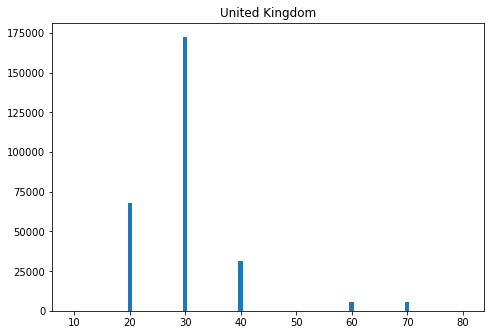

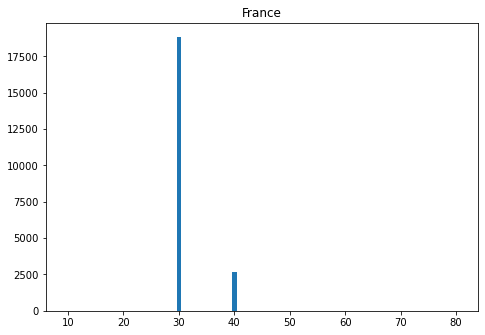

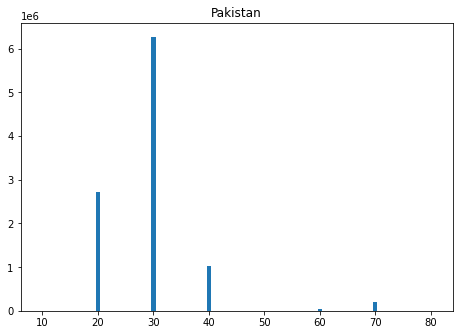

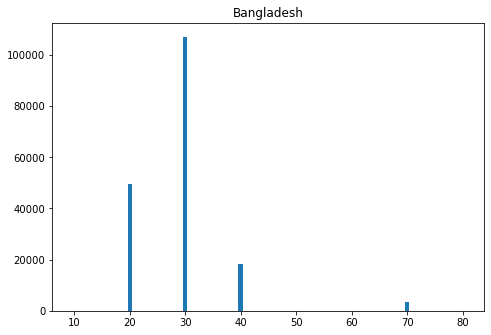

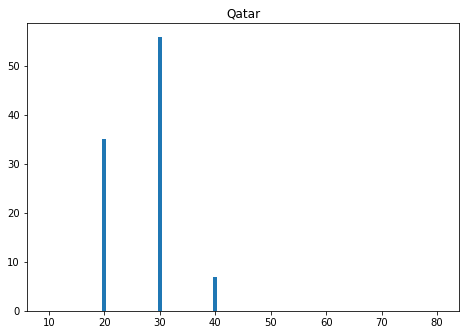

In [74]:
displayAgePlots(ageBins)

In [36]:
def terrorRegion(terrorism_data,income_data):
    reg_df = pd.merge(terrorism_data, income_data, how='left', on='country_txt')

    res_df = reg_df.groupby(['Region']).agg(count_region = ('iyear','count'))
    
    return res_df


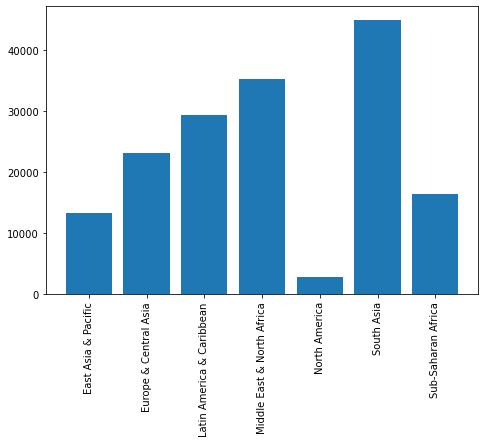

In [75]:
x = terror.index.tolist()
y = terror['count_region']

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(x,y)
plt.xticks(rotation=90)
plt.show()

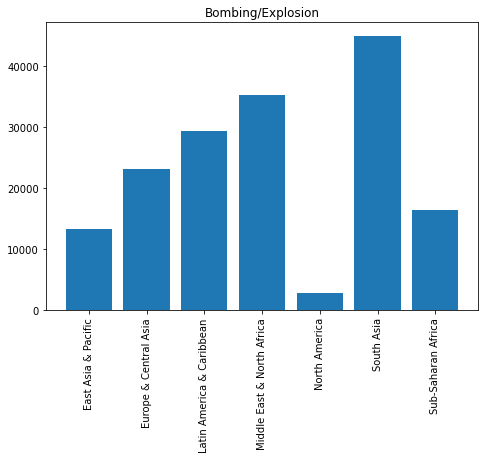

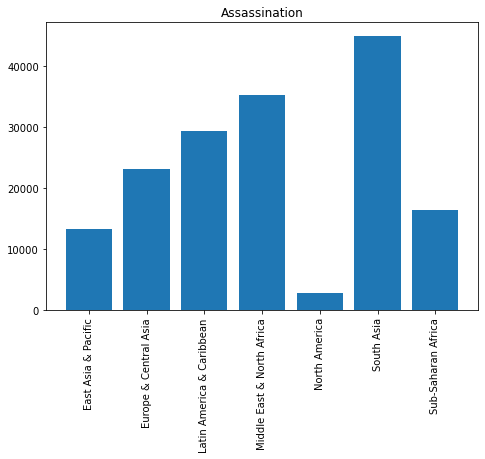

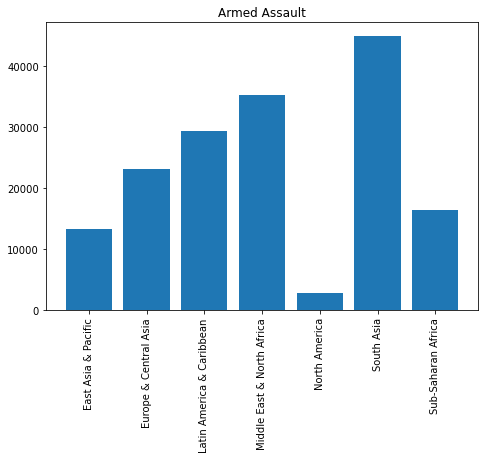

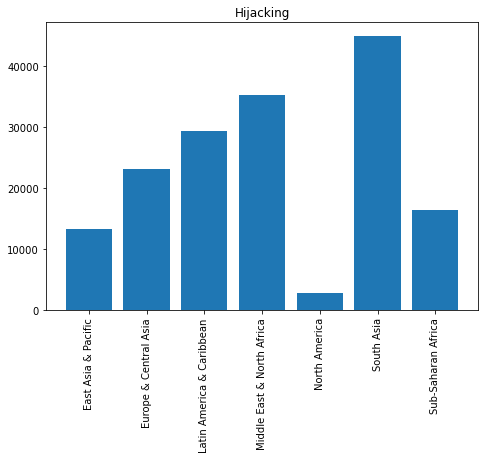

In [52]:
attacks = ['Bombing/Explosion','Assassination','Armed Assault','Hijacking']
for j in attacks:
    reg_df = pd.merge(terrorism_data, income_data, how='left', on='country_txt')
    options=[j]
    res_df1 = reg_df[reg_df['attacktype1_txt'].isin(options)]
    res_df = res_df1.groupby(['Region']).agg(count_region = ('iyear','count'))
    x = terror.index.tolist()
    y = terror['count_region']

    fig = plt.figure()
    ax = fig.add_axes([0,0,1,1])
    ax.bar(x,y)
    ax.set_title(j)
    plt.xticks(rotation=90)
    plt.show()

In [46]:
#main function
if __name__ == '__main__' :
    
    
    # Loading Data
    
    terrorism_data = load_terrorism_file('terrorism.csv')              # Loading Terrorism data for all countries
    perpetrators_data = load_perp_file('perps.csv')                    # age, marital, cit status
    terrorists_data = pd.read_csv('terrorists.csv')                    # country and cit status
    income_data = load_income_file('CLASS.xls')                        # has income for first and third world countries
    population_data = load_population_data('country_population.csv')   # has population data for each country year wise
    
    
    # Hypothesis 1
    countryIncome = mergeCountryIncome(terrorism_data,income_data)
    
    firstWorldIncome,firstWorldCountries= firstWorldCountry(countryIncome)
    thirdWorldIncome,thirdWorldCountries= thirdWorldCountry(countryIncome)
    
    
    fwcountriesPercentPop = highIncomePopulation(firstWorldIncome,population_data)
    twcountriesPercentPop = lowIncomePopulation(thirdWorldIncome,population_data)
    
    percentFWCountries = percentFirstWorldCountries(fwcountriesPercentPop,firstWorldCountries)
    percentTWCountries = percentThirdWorldCountries(twcountriesPercentPop,thirdWorldCountries)
    
    percentBothType = chartPrepData(percentFWCountries,percentTWCountries)
   

    # Hypothesis 2
    terrorists_data = terrorists_data.rename(columns={'country': 'country_txt'})
    terrorists_data['country_txt'].replace({'United States of America':'United States'},inplace=True)
    citizenshipStatus = citizenship(terrorism_data,terrorists_data)
    
    
    # Hypothesis 3
    ageBins=age(citizenshipStatus,perpetrators_data)
    
    # Testing further analysis for regions where most terror activities occured.
    terror = terrorRegion(terrorism_data,income_data)